In [20]:
import matplotlib.pyplot as plt
import numpy as np

#dataset containing faces
from sklearn.datasets import fetch_lfw_people

#dataset images étiquetées
people = fetch_lfw_people(min_faces_per_person = 70, resize = 0.4)

# largeur et longueur des images
n_samples, h, w = people.images.shape

#données, (chaque image est dans un tableau ou vecteur 1 dimension) 
X = people.data
#étiquettes de chaque image ex f(X[0]) = Y[0] = 5 => names[5] = "G. bush"
Y = people.target
names = people.target_names
#Le but de l'exercice est donc de créer cette fonction f(x) qui quand on lui fournit une image, nous donne le nom de la personne 


Text(0.5, 1.0, 'Visage moyen creepy shit')

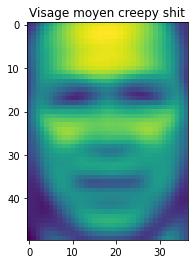

In [55]:
#Calculons la moyenne des visages :o
visageMoyen = np.zeros(h*w) #Initialisser un tableau numpy vide 1 dimension
#Ajouter toutes les images
for image in X:
    visageMoyen = np.add(image,visageMoyen)
#Diviser par le nombre d'images
visageMoyen = np.divide(visageMoyen,len(X))
plt.imshow(visageMoyen.reshape((h,w)))
plt.title("Visage moyen creepy shit")


[1. 2.]
